## [Q1, 6 marks] 
Write a script that takes the name of any of the data files as a command line input and
outputs the data as asked in the file itself. The file contains unknown number of header lines starting
with the # character. The header is followed by unknown number of data lines in two or more 
columns. The header shall contain which column is taken as x, which as y. The output should 
contain three columns x, y, z separated by a space and ensuring that the value of z for each row is as
given in the header. Assume that the formula for z will always be of the type z=a*x+b*y+c where 
a,b,c are real numbers as constants. An example usage of the script with a single argument (one of 
the files in the above mentioned directory) should be as follows:


In [1]:
!./assn1a.sh ./data-files/data-file-1.txt

data-output-1.txt


Output expected, without the header lines and only the columns asked, is a file name as shown 
below. The output file will have three columns separated by a space. Your output file will be 
compared to that in the data-files folder. This comparison is not bit-by-bit but using the sum of 
square of differences of the third columns (total numerical error). This is to account for small 
numerical error in reading the numbers and writing them out in specific format with certain 
decimal places. The total numerical error shall be below a threshold for the script to pass the test.

## Code:

In [2]:
!cat assn1a.sh

#! /usr/bin/bash
#ae22b062
if [ $# -eq 0 ]; then
echo "pls Enter a file"
exit

fi

export d=$1
xn=`sed -n -e '2s\[^0-9.]\ \g;2p' $d | awk '{print $1}' `
yn=`sed -n -e '3s\[^0-9.]\ \g;3p' $d | awk '{print $1}'`

a=`sed -n -e '4s\[^0-9.]\ \g;4p' $d | awk '{print $1}'`
b=`sed -n -e '4s\[^0-9.]\ \g;4p' $d | awk '{print $2}'`
c=`sed -n -e '4s\[^0-9.]\ \g;4p' $d | awk '{print $3}'`


#sed -n -e '5,$s\[^0-9.]\ \g;5,$p' $d
sed -n -e '5,$s\[^0-9.]\ \g;5,$p' $d | awk -v xn=$xn -v yn=$yn -v a=$a -v b=$b -v c=$c '{z=a*$xn+b*$yn+c;printf( "%.5f %.5f %.5f\n",$ xn ,$ yn,z)} ' >data-output.txt
echo "data-output-1.txt"


How I solved this Qs is by breaking it down into stages 
1. We get the columun that has the value of x 

2. Then we do the same to get the value of y

3. Then we use the value of a ,b, c to get the value of z and print it the required format


Then to extract any value of first remove all the characters which are not numbers of the decimal.
And replace the with a space


With the method it is very easy to get the value of x's and y's coloum and a, b and c.

Now to pass these values inside of awk using -v for each variable. In awk we calculate the value of z and print every thing in required format.

---------
---------

## [Q2. 6 marks]
Write a script that takes one of the tar file names as a command line input and outputs
the file that is at the deepest level in the tar file. Assume that the directory level depth is relative to 
the current directory where the tar file would be untar-ed. 

In [3]:
!./assn1b.sh ./tar-files/t1.tar

e1


## Code:

In [4]:
!cat assn1b.sh

#! /usr/bin/bash
#ae22b062
tar -xvf $1 | awk 'BEGIN{FS="/";depth=0;line=0;}{ if(NF>depth){if($NF!=""){depth=NF;line=NR;ans=$NF;}}}END{print ans;}'


First we untar the file, but while untaring it we add the -v to view the content of the untar-ed file

To find the deepest directory we declare / as a field seperator. With this we can find number of fields.
But in this method we get one extar field if the last character is a / but can skip that line entirely and the deepest directory can't be empty.
Now we go though all the lines and check the line number and the number of field. Record them if there value is greater than the previously recorded value of number of fields.

-----
-----

## [Q2, 4 marks]
In your $HOME directory, keep a file assn1c.json which should contain the 
following fields as described across. Once you create this json file, do not edit the script files 
because their MD5SUM would change.

In [5]:
!cat assn1c.json

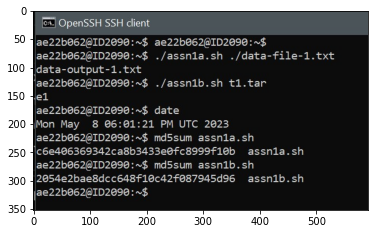